In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

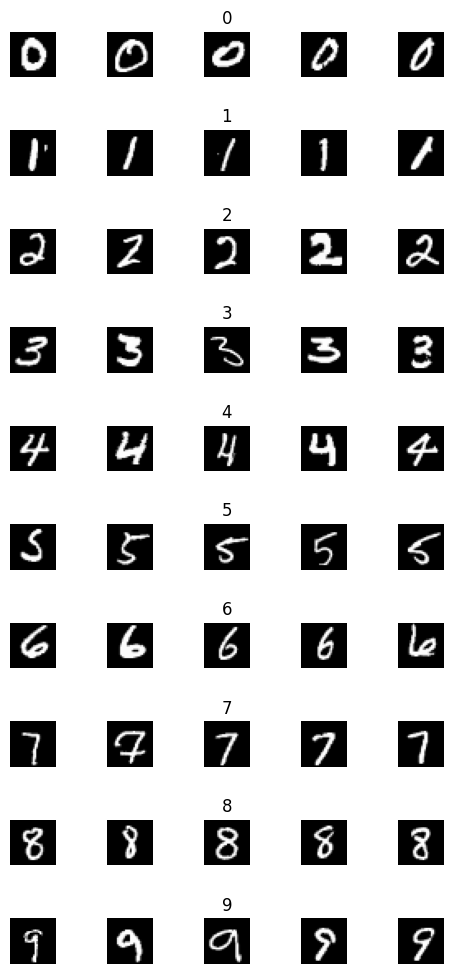

In [6]:
num_of_samples=[]

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


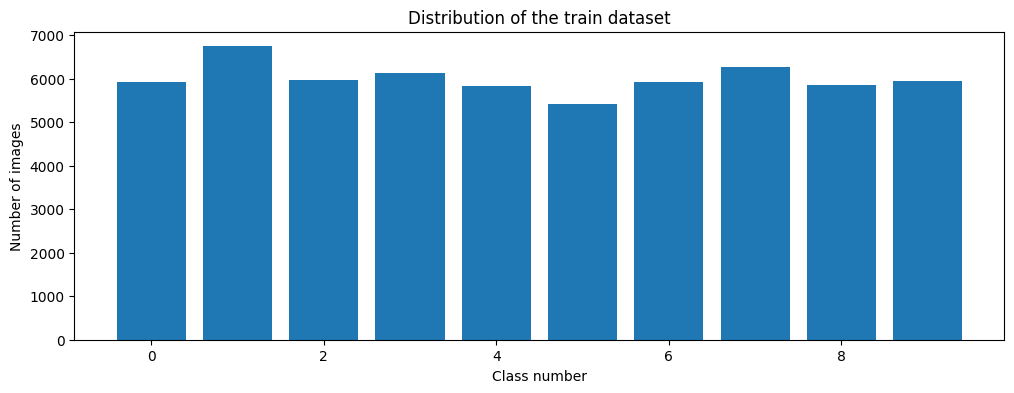

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [30]:
def leNet_model():
  model = Sequential()
  model.add(tensorflow.keras.Input(shape = ((28, 28, 1))))
  model.add(Conv2D(30, (5,5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [31]:
model = leNet_model()

In [32]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 39s 261ms/step - accuracy: 0.8193 - loss: 0.5427 - val_accuracy: 0.9837 - val_loss: 0.0506
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 36s 270ms/step - accuracy: 0.9776 - loss: 0.0711 - val_accuracy: 0.9882 - val_loss: 0.0439
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 34s 251ms/step - accuracy: 0.9823 - loss: 0.0551 - val_accuracy: 0.9885 - val_loss: 0.0467
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - accuracy: 0.9832 - loss: 0.0527 - val_accuracy: 0.9902 - val_loss: 0.0388
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 43s 265ms/step - accuracy: 0.9850 - loss: 0.0474 - val_accuracy: 0.9892 - val_loss: 0.0439
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 34s 251ms/step - accuracy: 0.9879 - loss: 0.0406 - val_accuracy: 0.9883 - val_loss: 0.0419
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 43s 265ms/step - accuracy: 0.9890 - loss: 0.0367 - val_accuracy: 0.9865 - val_loss: 0.0520
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 39s 253ms/step - accuracy: 0.9877 - loss: 0

Text(0.5, 0, 'epoch')

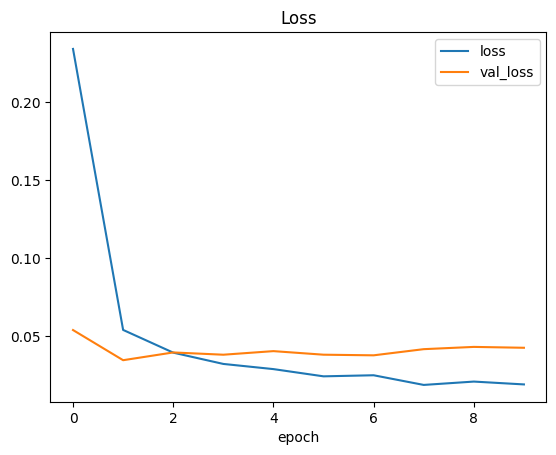

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

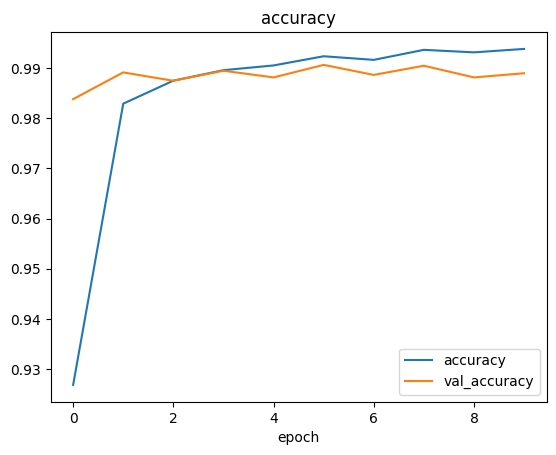

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

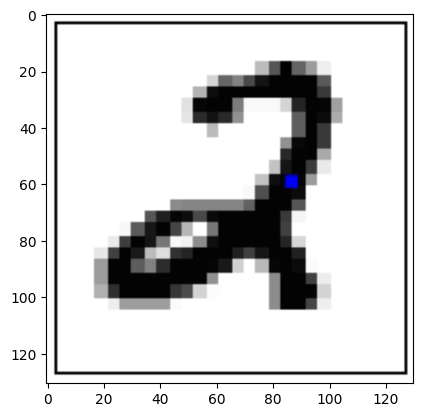

In [22]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

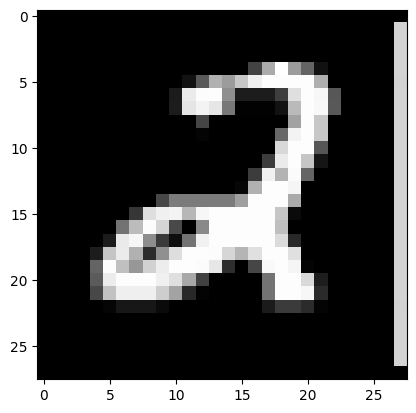

In [23]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [24]:
img = img/255
img = img.reshape(1, 28, 28, 1)

In [25]:
prediction = np.argmax((model.predict(img)))
print("predicted digit:", str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicted digit: 2


In [26]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.04905455559492111
Test accuracy: 0.9866999983787537


In [36]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img) , layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


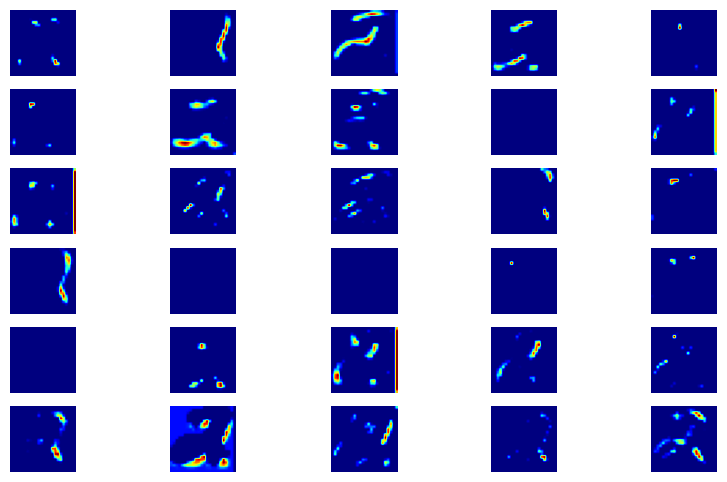

In [37]:
plt.figure(figsize = (10, 6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')

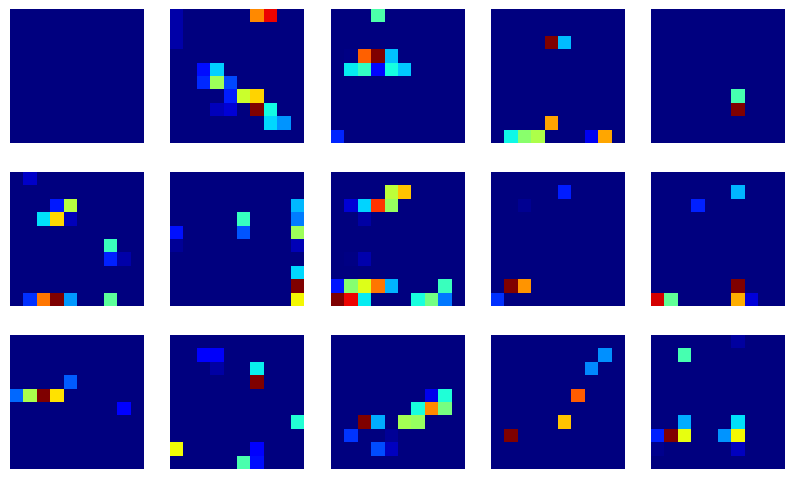

In [38]:
plt.figure(figsize = (10, 6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')